In [35]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

# Set max row to 300
pd.set_option('display.max_rows', 300)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Interactive charts
%matplotlib inline

In [59]:
# Parameters
K = 100     # Strike
r = 0.1     # Risk-free rate
S0 = 100    # Spot price
sigma = 0.2 # Volatility
T = 1       # Number of years
ts = 252    # Number of timesteps per year
ns = 1000   # Number of simulations

In [60]:
# Simulation function, given 1 of the 3 schemes
def simulate_path(S0 = S0, mu = r, sigma = sigma, T = T, ts = ts, ns = ns):
    """
    This function returns a (ts, ns)-shaped numpy array of simulated prices, 
    using closed-form solution. 
    
    Parameters
    ----------
    S0          int or float    - Spot price, optional, default: 100
    mu          float           - Expected return (equal to r under the RN random walk), optional, default: 0.05
    sigma       float           - Volatility, optional, default: 0.2
    T           int or float    - Time to maturity in years, optional, default: 1
    ts          int             - Number of time steps per year, optional, default: 252
    ns          int             - Number of simulations, optional, default: 1,000
    
    Returns
    ----------
    S           array           - A (ts, ns)-shaped numpy array of simulated prices
    """

    # Set the random seed for reproducibility
    np.random.seed(0)
    
    # Define dt
    dt = T/ts                # Length of time interval in years
    
    # Simulate 'ns' asset price paths, each with 'ts' timesteps
    S = np.zeros((ts,ns)); S[0] = S0
    
    for i in range(0, ts-1):
        w = np.random.standard_normal(ns)
        S[i+1] = S[i] * np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*w)

    return S

In [61]:
x = range(1, T*ts+1)
S = simulate_path()

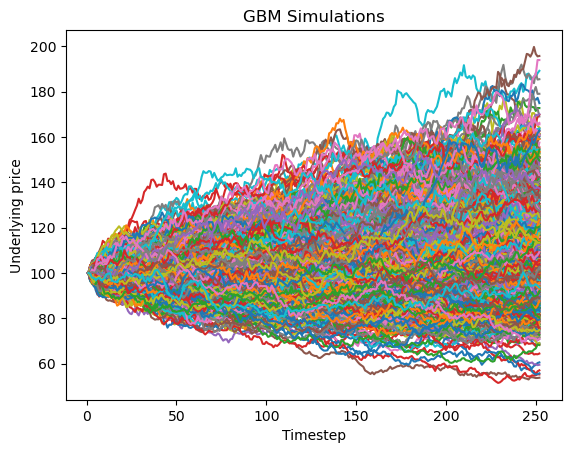

In [39]:
fig, ax = plt.subplots()

ax.plot(x, S)
plt.title("GBM Simulations") 
plt.xlabel("Timestep") 
plt.ylabel("Underlying price")

plt.show()

In [40]:
max(3, 5)

5

In [62]:
# European call
C = np.exp(-r*T) * np.mean(np.maximum(S[-1] - K, 0))
C

13.345862527272885

In [63]:
# European put
P = np.exp(-r*T) * np.mean(np.maximum(K - S[-1], 0))
P

3.7370695969059358

In [64]:
#check pcp
C + 100*np.exp(-r*T)

103.82960433086883

In [65]:
S0 + P

103.73706959690594